In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize and reshape
X_train = X_train / 255.0
X_test = X_test / 255.0
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
# Simple CNN
def simple_cnn(filter_count=32, learning_rate=0.001, optimizer='adam'):
    model = Sequential([
        Conv2D(filter_count, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    
    # Select optimizer
    if optimizer == 'adam':
        opt = Adam(learning_rate=learning_rate)
    elif optimizer == 'sgd':
        opt = SGD(learning_rate=learning_rate, momentum=0.9)
    else:
        raise ValueError("Unsupported optimizer")
    
    # Compile the model
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Experiment: Simple CNN with default config
print("Training Simple CNN with default configuration...")
simple_default = simple_cnn()
history_simple_default = simple_default.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=64)

# Experiment: Simple CNN with one different filter (64 instead of 32)
print("\nTraining Simple CNN with 64 filters...")
simple_filters = simple_cnn(filter_count=64)
history_simple_filters = simple_filters.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=64)

# Experiment: Simple CNN with one different learning rate (0.0001)
print("\nTraining Simple CNN with learning rate 0.0001...")
simple_lr = simple_cnn(learning_rate=0.0001)
history_simple_lr = simple_lr.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=64)

# Experiment: Simple CNN with SGD optimizer
print("\nTraining Simple CNN with SGD optimizer...")
simple_sgd = simple_cnn(optimizer='sgd')
history_simple_sgd = simple_sgd.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=64)

# Compare with deeper CNN
print("\nTraining Deeper CNN...")
def deeper_cnn():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        BatchNormalization(),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

deeper = deeper_cnn()
history_deeper = deeper.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=64)


Training Simple CNN with default configuration...


c:\Users\abdul\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8334 - loss: 0.5454 - val_accuracy: 0.9707 - val_loss: 0.1027
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9575 - loss: 0.1433 - val_accuracy: 0.9800 - val_loss: 0.0699
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9717 - loss: 0.0980 - val_accuracy: 0.9812 - val_loss: 0.0647
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9765 - loss: 0.0792 - val_accuracy: 0.9832 - val_loss: 0.0579
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9784 - loss: 0.0696 - val_accuracy: 0.9841 - val_loss: 0.0542
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9823 - loss: 0.0565 - val_accuracy: 0.9842 - val_loss: 0.0548
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9844 - loss: 0.0504 - val_accuracy: 0.9859 - val_loss: 0.0512
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9850 - loss: 0.0450 - val_accuracy: 0.

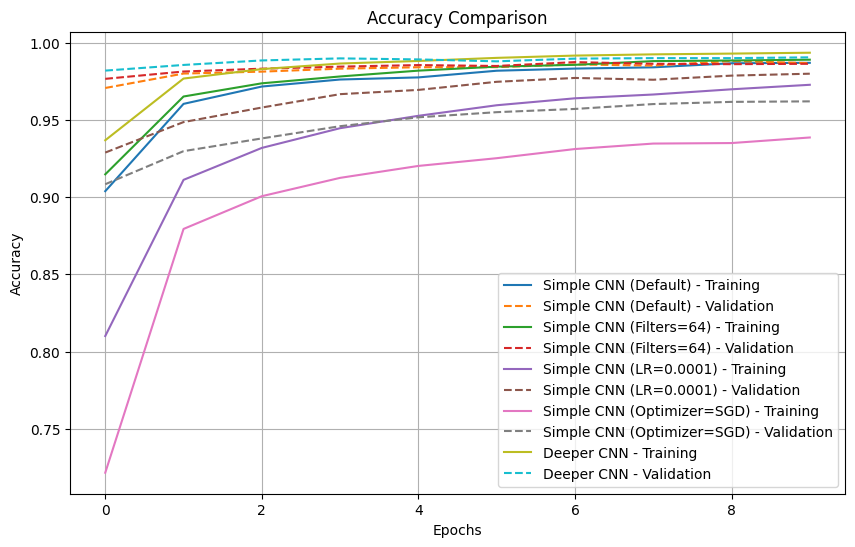

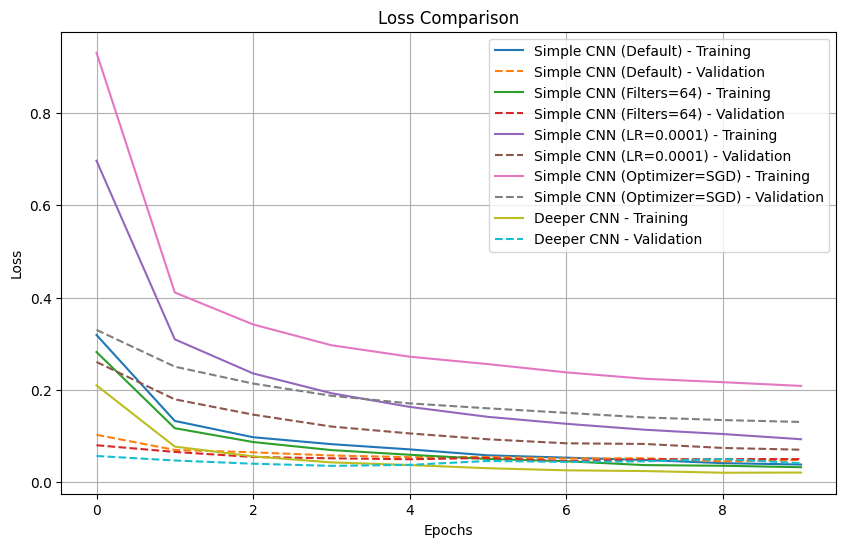

In [4]:
import matplotlib.pyplot as plt

# Function to plot training and validation metrics
def plot_metrics(histories, labels, metric='accuracy', title='Accuracy Comparison'):
    plt.figure(figsize=(10, 6))
    for history, label in zip(histories, labels):
        plt.plot(history.history[metric], label=f'{label} - Training')
        plt.plot(history.history[f'val_{metric}'], linestyle='--', label=f'{label} - Validation')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.grid(True)
    plt.show()

# Collect histories and labels
histories = [
    history_simple_default,
    history_simple_filters,
    history_simple_lr,
    history_simple_sgd,
    history_deeper
]
labels = [
    "Simple CNN (Default)",
    "Simple CNN (Filters=64)",
    "Simple CNN (LR=0.0001)",
    "Simple CNN (Optimizer=SGD)",
    "Deeper CNN"
]

# Plot accuracy comparison
plot_metrics(histories, labels, metric='accuracy', title='Accuracy Comparison')

# Plot loss comparison
plot_metrics(histories, labels, metric='loss', title='Loss Comparison')


In [6]:
# Calculate final validation accuracies
final_val_accuracies = [history.history['val_accuracy'][-1] for history in histories]

# Rank models based on validation accuracy
ranked_models = sorted(zip(labels, final_val_accuracies), key=lambda x: x[1], reverse=True)

# Display rankings
print("Model Rankings (Based on Final Validation Accuracy):")
for rank, (label, acc) in enumerate(ranked_models, start=1):
    print(f"{rank}. {label}: {acc:.4f}")


Model Rankings (Based on Final Validation Accuracy):
1. Deeper CNN: 0.9905
2. Simple CNN (Default): 0.9868
3. Simple CNN (Filters=64): 0.9863
4. Simple CNN (LR=0.0001): 0.9799
5. Simple CNN (Optimizer=SGD): 0.9620
